# 🧽 Limpieza de Datos y Visualización con Plotly — Versión Completa y Explicada
Este notebook cubre técnicas avanzadas de limpieza de datos con Pandas, aplicadas a varios datasets con problemas reales. Cada sección incluye una parte de análisis y visualización con Plotly para interpretar mejor las decisiones tomadas.

## 📦 Librerías necesarias

In [4]:
# 📌 Importación de librerías necesarias para la limpieza y visualización
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')  # Evitamos mensajes de advertencia molestos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser'

## 📂 Dataset 1: Errores comunes — Nulos, duplicados, formatos

In [5]:
# 📌 Creamos un DataFrame simulado con errores comunes: espacios en blanco, valores nulos,
# formatos inconsistentes y categorías mal escritas.
raw_data = {
    'Nombre': [' Ana ', 'Luis', 'Luis', 'marta', None, 'PEDRO',
               ' Clara', 'jose', 'JOSE ', '   Alba', 'LUCIA', 'lucia'],
    'Edad':   [25, 30, 30, None, 22, 41,
               27, 29, 29, 24, None, 24],
    'Genero': ['F', 'M', 'M', 'f', 'Femenino', 'Masculino',
               'f', 'M', 'masculino', 'F', 'femenino', 'F'],
    'Fecha_registro': ['2023/01/15', '15-01-2023', '15-01-2023', '2023/01/16',
                       '2023-01-17', '16/01/2023', '2023-01-18', '17/01/2023',
                       '2023-01-19', '18-01-2023', '2023/01/20', '2023-01-20']
}

df1 = pd.DataFrame(raw_data)
df1

,Nombre,Edad,Genero,Fecha_registro
0,Ana,25.0,F,2023/01/15
1,Luis,30.0,M,15-01-2023
2,Luis,30.0,M,15-01-2023
3,marta,NaN,f,2023/01/16
4,None,22.0,Femenino,2023-01-17
5,PEDRO,41.0,Masculino,16/01/2023
6,Clara,27.0,f,2023-01-18
7,jose,29.0,M,17/01/2023
8,JOSE,29.0,masculino,2023-01-19
9,Alba,24.0,F,18-01-2023


### 🧹 Limpieza de nulos y duplicados
Eliminamos duplicados y decidimos qué hacer con los valores nulos.

In [6]:
# Mostramos cuántos valores nulos hay por columna
# Esto nos permite saber qué columnas requieren limpieza
df1.isnull().sum()

Nombre            1
Edad              2
Genero            0
Fecha_registro    0
dtype: int64

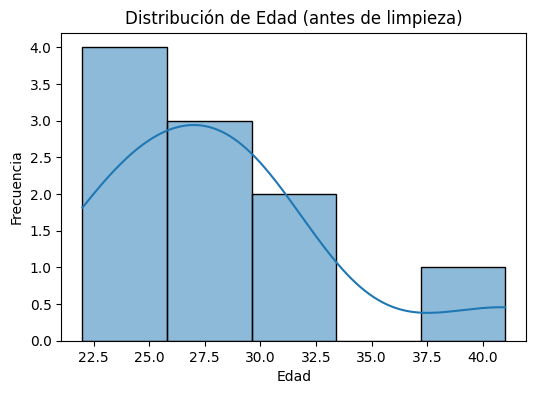

In [7]:
# Histograma de Edad con nulos (se ignoran automáticamente en el gráfico)
plt.figure(figsize=(6, 4))
sns.histplot(df1['Edad'], kde=True,bins=5)
plt.title("Distribución de Edad (antes de limpieza)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


In [8]:
# Rellenamos los nulos de la columna 'Edad' con la mediana
# Esto es mejor que usar la media si hay valores extremos
df1['Edad'] = df1['Edad'].fillna(df1['Edad'].median())

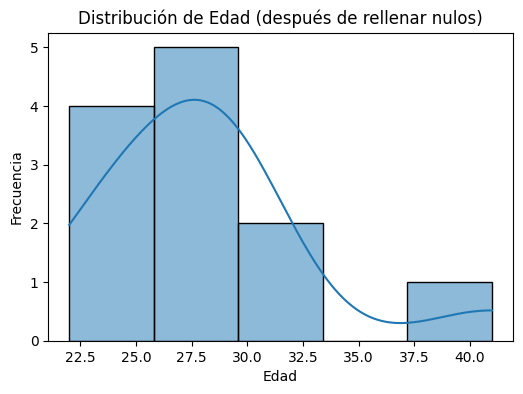

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(df1['Edad'], kde=True, bins=5)
plt.title("Distribución de Edad (después de rellenar nulos)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

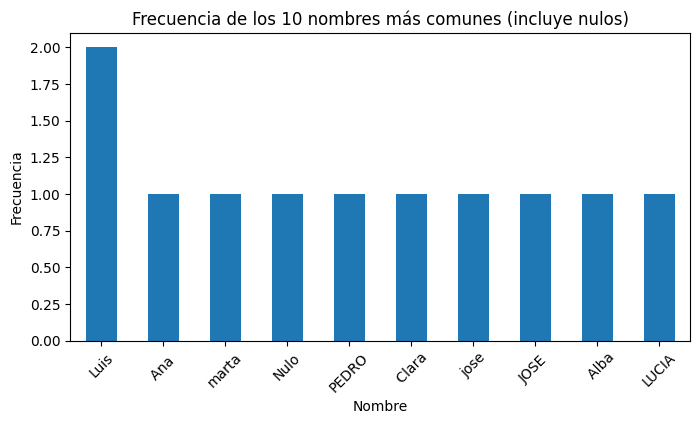

In [10]:
#Visualizar nulos 
# Gráfico de barras con los valores más frecuentes en 'Nombre'
plt.figure(figsize=(8, 4))
nombres_temp = df1['Nombre'].fillna('Nulo')
nombres_temp.value_counts().head(10).plot(kind='bar')
plt.title("Frecuencia de los 10 nombres más comunes (incluye nulos)")
plt.ylabel("Frecuencia")
plt.xlabel("Nombre")
plt.xticks(rotation=45)
plt.show()


In [11]:
# Eliminamos las filas donde 'Nombre' está vacío (NaN)
# Consideramos que el 'Nombre' es un campo obligatorio
df1 = df1.dropna(subset=['Nombre'])

<Figure size 800x400 with 0 Axes>

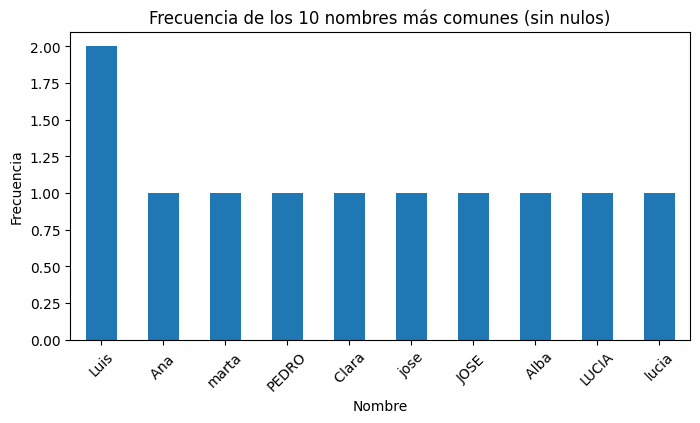

In [12]:
plt.figure(figsize=(8, 4))
plt.figure(figsize=(8, 4))
nombres_temp = df1['Nombre'].fillna('Nulo')
nombres_temp.value_counts().head(10).plot(kind='bar')
plt.title("Frecuencia de los 10 nombres más comunes (sin nulos)")
plt.ylabel("Frecuencia")
plt.xlabel("Nombre")
plt.xticks(rotation=45)
plt.show()


### 🧹 Limpieza de texto y categorías
Uniformizamos los textos: quitamos espacios, pasamos a minúsculas y agrupamos etiquetas.

In [13]:
# Visualizamos los valores únicos antes de limpiar 'Nombre' y 'Genero'
print("Valores únicos en 'Nombre' antes de limpiar:")
print(df1['Nombre'].unique())

print("\nValores únicos en 'Genero' antes de limpiar:")
print(df1['Genero'].unique())


Valores únicos en 'Nombre' antes de limpiar:
[' Ana ' 'Luis' 'marta' 'PEDRO' ' Clara' 'jose' 'JOSE ' '   Alba' 'LUCIA'
 'lucia']

Valores únicos en 'Genero' antes de limpiar:
['F' 'M' 'f' 'Masculino' 'masculino' 'femenino']


In [14]:
# 📌 Limpiamos los textos:
# - Quitamos espacios y ponemos en formato título en 'Nombre'
# - Normalizamos 'Genero' a minúsculas y agrupamos sinónimos
df1['Nombre'] = df1['Nombre'].str.strip().str.title()
df1['Genero'] = df1['Genero'].str.lower().replace({'femenino': 'f', 'masculino': 'm'})
df1

,Nombre,Edad,Genero,Fecha_registro
0,Ana,25.0,f,2023/01/15
1,Luis,30.0,m,15-01-2023
2,Luis,30.0,m,15-01-2023
3,Marta,28.0,f,2023/01/16
5,Pedro,41.0,m,16/01/2023
6,Clara,27.0,f,2023-01-18
7,Jose,29.0,m,17/01/2023
8,Jose,29.0,m,2023-01-19
9,Alba,24.0,f,18-01-2023
10,Lucia,28.0,f,2023/01/20


In [15]:
# Visualizamos los valores únicos después de la limpieza
print("Valores únicos en 'Nombre' después de limpiar:")
print(df1['Nombre'].unique())

print("\nValores únicos en 'Genero' después de limpiar:")
print(df1['Genero'].unique())


Valores únicos en 'Nombre' después de limpiar:
['Ana' 'Luis' 'Marta' 'Pedro' 'Clara' 'Jose' 'Alba' 'Lucia']

Valores únicos en 'Genero' después de limpiar:
['f' 'm']


### 🧹 Conversión de fechas
Unificamos múltiples formatos de fecha en una sola columna tipo datetime.

In [16]:
# Visualizamos los valores únicos antes de convertir 'Fecha_registro'
print("Valores únicos en 'Fecha_registro' antes de convertir:")
print(df1['Fecha_registro'].unique())

Valores únicos en 'Fecha_registro' antes de convertir:
['2023/01/15' '15-01-2023' '2023/01/16' '16/01/2023' '2023-01-18'
 '17/01/2023' '2023-01-19' '18-01-2023' '2023/01/20' '2023-01-20']


In [17]:
# 📌 Convertimos la columna 'Fecha_registro' a formato datetime
# Se fuerza dayfirst=True para fechas como '15-01-2023'
df1['Fecha_registro'] = pd.to_datetime(df1['Fecha_registro'], format='mixed', dayfirst=True)
df1


,Nombre,Edad,Genero,Fecha_registro
0,Ana,25.0,f,2023-01-15
1,Luis,30.0,m,2023-01-15
2,Luis,30.0,m,2023-01-15
3,Marta,28.0,f,2023-01-16
5,Pedro,41.0,m,2023-01-16
6,Clara,27.0,f,2023-01-18
7,Jose,29.0,m,2023-01-17
8,Jose,29.0,m,2023-01-19
9,Alba,24.0,f,2023-01-18
10,Lucia,28.0,f,2023-01-20


In [18]:
# Visualizamos los valores únicos después de convertir
print("Valores únicos en 'Fecha_registro' después de convertir:")
print(df1['Fecha_registro'].unique())


Valores únicos en 'Fecha_registro' después de convertir:
<DatetimeArray>
['2023-01-15 00:00:00', '2023-01-16 00:00:00', '2023-01-18 00:00:00',
 '2023-01-17 00:00:00', '2023-01-19 00:00:00', '2023-01-20 00:00:00']
Length: 6, dtype: datetime64[ns]


### 🧹 Limpieza de duplicados

In [19]:
# Contamos cuántas filas duplicadas completas hay en el DataFrame
duplicados = df1.duplicated().sum()
print(f'N.º de filas duplicadas: {duplicados}')

N.º de filas duplicadas: 1


In [20]:
# Mostramos las filas duplicadas completas si existen
if duplicados > 0:
    display(df1[df1.duplicated(keep=False)])
else:
    print('No hay filas duplicadas.')

,Nombre,Edad,Genero,Fecha_registro
1,Luis,30.0,m,2023-01-15
2,Luis,30.0,m,2023-01-15


In [21]:
# Eliminamos duplicados completos (todas las columnas iguales)
df1 = df1.drop_duplicates()

In [22]:
# Verificamos que ya no quedan duplicados
duplicados_restantes = df1.duplicated().sum()
print(f'Duplicados restantes tras la limpieza: {duplicados_restantes}')

Duplicados restantes tras la limpieza: 0


### 📊 Visualizaciones con Plotly tras limpieza de datos


### 🔍 Distribución de edades



In [23]:
# 📊 Histograma de edades para observar la distribución tras limpieza
fig = px.histogram(df1, x='Edad', nbins=10, title='Distribución de Edades (Post-Limpieza)')
fig.show()


### 🔍 Registros por fecha

Este histograma representa el número de registros según la fecha de inscripción.
Podemos observar picos o patrones temporales, y validar si el campo de fechas está correctamente normalizado.


In [24]:
# 📊 Histograma de registros por fecha para detectar picos temporales
fig = px.histogram(df1, x='Fecha_registro', nbins=10, title='Registros por Fecha')
fig.show()

## 📂 Dataset 2: Categóricas desordenadas

In [25]:

# Esta celda realiza...
df2 = pd.DataFrame({
    'categoria': ['Premium', 'premium', 'PREMIUM', 'Basico', 'básico', 'Standard', 'standard', 'standar', 'STÁNDAR'],
    'ventas': np.random.randint(100, 1000, 9)
})
df2

,categoria,ventas
0,Premium,710
1,premium,651
2,PREMIUM,243
3,Basico,709
4,básico,693
5,Standard,824
6,standard,379
7,standar,447
8,STÁNDAR,831


### 🧹 Normalización de categorías
Convertimos todas las variantes en etiquetas únicas usando `.lower()` y mapeo manual.

In [26]:
# Mostramos los valores únicos y el conteo antes de normalizar 'categoria'
print("Valores únicos en 'categoria' antes de limpiar:")
print(df2['categoria'].unique())

print("\nConteo por categoría antes de limpiar:")
print(df2['categoria'].value_counts())


Valores únicos en 'categoria' antes de limpiar:
['Premium' 'premium' 'PREMIUM' 'Basico' 'básico' 'Standard' 'standard'
 'standar' 'STÁNDAR']

Conteo por categoría antes de limpiar:
categoria
Premium     1
premium     1
PREMIUM     1
Basico      1
básico      1
Standard    1
standard    1
standar     1
STÁNDAR     1
Name: count, dtype: int64


In [85]:
# 📌 Explicación:
# Esta celda realiza...
df2['categoria'] = df2['categoria'].str.lower().replace({
    'premium': 'Premium', 'standard': 'Standard', 'standar': 'Standard', 'stándar': 'Standard',
    'basico': 'Básico', 'básico': 'Básico'
})
df2 = df2.groupby('categoria', as_index=False).sum()

,categoria,ventas
0,Básico,1868
1,Premium,1714
2,Standard,1525


In [88]:
# Mostramos el resultado final con las categorías ya normalizadas
print("Valores únicos en 'categoria' después de limpiar:")
print(df2['categoria'].unique())

print("\nDataFrame final agrupado por categoría:")
display(df2)

Valores únicos en 'categoria' después de limpiar:
['Básico' 'Premium' 'Standard']

DataFrame final agrupado por categoría:


,categoria,ventas,% acumulado
0,Básico,1868,0.365772
1,Premium,1714,0.701390
2,Standard,1525,1.000000


### 📊 Visualización: Pareto de ventas por categoría

In [1]:
import plotly.graph_objects as go

# Creamos la figura base
fig = go.Figure()

# Añadimos el gráfico de barras (ventas)
fig.add_bar(
    x=df2['categoria'],
    y=df2['ventas'],
    name='Ventas',
    marker_color='lightskyblue',
    yaxis='y1'  # eje primario
)

# Añadimos la línea del % acumulado (eje secundario)
fig.add_trace(go.Scatter(
    x=df2['categoria'],
    y=df2['% acumulado'],
    mode='lines+markers',
    name='% Acumulado',
    yaxis='y2',  # eje secundario
    line=dict(color='crimson')
))

# Configuración de layout con dos ejes Y
fig.update_layout(
    title='Ventas por Categoría con % Acumulado',
    xaxis=dict(title='Categoría'),
    yaxis=dict(title='Ventas', side='left'),
    yaxis2=dict(
        title='% Acumulado',
        overlaying='y',
        side='right',
        tickformat='.0%',  # formatear como porcentaje
        range=[0, 1]
    ),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()


NameError: name 'df2' is not defined

## 📂 Dataset 3: Datos temporales con errores

In [96]:
# 1. Creamos un rango completo del 1 al 10 de enero
fechas_base = pd.date_range(start='2023-01-01', end='2023-01-10')

# 2. Eliminamos manualmente algunas fechas para simular días perdidos
fechas_erroneas = fechas_base.delete([2, 5])  # elimina 3 y 6 de enero (index 2 y 5)

# 3. Añadimos duplicados intencionados
fechas_erroneas = list(fechas_erroneas) + [pd.Timestamp('2023-01-05'), pd.Timestamp('2023-01-02')]

# 4. Creamos el DataFrame
df3 = pd.DataFrame({
    'fecha': fechas_erroneas,
    'visitas': np.random.randint(50, 200, len(fechas_erroneas))
})

# 5. Desordenamos filas
df3 = df3.sample(frac=1).reset_index(drop=True)
df3




,fecha,visitas
0,2023-01-05,103
1,2023-01-01,190
2,2023-01-02,165
3,2023-01-08,71
4,2023-01-07,176
5,2023-01-05,150
6,2023-01-04,150
7,2023-01-09,60
8,2023-01-10,186
9,2023-01-02,88


### 🧹 Tratamiento de fechas duplicadas y faltantes

In [97]:

fig = px.line(df3, x='fecha', y='visitas', markers=True,
              title='Visitas diarias (con errores: fechas duplicadas y días faltantes)')
fig.show()



In [98]:
# Agrupamos duplicadas sumando visitas
df3_clean = df3.groupby('fecha', as_index=False).sum()

# Rellenamos días faltantes con 0 visitas
rango_completo = pd.date_range(start=df3_clean['fecha'].min(), end=df3_clean['fecha'].max())
df3_clean = df3_clean.set_index('fecha').reindex(rango_completo).fillna(0).rename_axis('fecha').reset_index()


### 📊 Visualización: Evolución temporal de visitas

In [100]:
fig = px.line(df3_clean, x='fecha', y='visitas', markers=True,
              title='Visitas diarias (después de limpiar y completar fechas)')
fig.show()


## 📅 Comparación por subgrupos temporales
En un dataset simulado, agrupamos por semana o mes para mostrar cómo cambia la métrica.

In [ ]:
# 📌 Explicación:
# Esta celda realiza...
df_temporal = pd.DataFrame({
    'fecha': pd.date_range(start='2023-01-01', periods=120),
    'ventas': np.random.normal(200, 50, 120)
})

In [ ]:
df_temporal['semana'] = df_temporal['fecha'].dt.isocalendar().week #2. Añadimos la columna 'semana' con el número de semana del año según el calendario ISO
ventas_semanales = df_temporal.groupby('semana')['ventas'].mean().reset_index() # 📌 3. Agrupamos por semana y calculamos la media de ventas por semana

In [ ]:
px.line(ventas_semanales, x='semana', y='ventas', title='Evolución semanal de ventas')


In [105]:
# 📌 Añadimos la columna 'mes' extraída de la fecha
df_temporal['mes'] = df_temporal['fecha'].dt.month

# 📌 Agrupamos por mes y calculamos la media de ventas
ventas_mensuales = df_temporal.groupby('mes')['ventas'].mean().reset_index()

In [110]:
fig = px.line(ventas_mensuales, x='mes', y='ventas',
              title='Evolución mensual de ventas',
              labels={'mes': 'Mes', 'ventas': 'Media de ventas'})
# ✅ Evitamos decimales en el eje X
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.show()

In [107]:
# 📌 Añadimos la columna 'trimestre' extraída de la fecha
df_temporal['trimestre'] = df_temporal['fecha'].dt.quarter

# 📌 Agrupamos por trimestre y calculamos la media de ventas
ventas_trimestrales = df_temporal.groupby('trimestre')['ventas'].mean().reset_index()


In [109]:

# 📊 Visualizamos la evolución trimestral de las ventas
fig = px.line(ventas_trimestrales, x='trimestre', y='ventas',
              title='Evolución trimestral de ventas',
              labels={'trimestre': 'Trimestre', 'ventas': 'Media de ventas'})
# ✅ Evitamos decimales en el eje X
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.show()